# Titanic Dataset - Data Models

## Task - 1

- Create model that predicts the survival of a passenger based on the data given in the [Titanic dataset](https://www.kaggle.com/datasets/brendan45774/test-file).



## About the data 

| **Column** Name  |  **Description** |
| -------------|-----------------------------|
|**PassengerId** | Id of the ticket holder |
| **Survived** | Survival (0 = No; 1 = Yes). Not included in test.csv file |
| **Pclass** | Ticket Class of the passangers |
| **Name** | Name og the passenger|
| **Sex** | Sex of the passenger|
| **Age** | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 |
| **Sibsp** | Number of Siblings (brother, sister, etc.) /Spouses (husband, wife) aboard |
| **Parch** | Number of Parents/Children aboard; Some children travelled only with a nanny, therefore parch=0 for them. |
| **Ticket** | Ticket Number |
| **Fare** | Fare of the ticket |
| **Cabin** | Cabin Number |
| **Embarked** | Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) |

## Import required modules

In [1]:
# required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# modules to model data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

# Modules to check accuracy
from sklearn.metrics import accuracy_score, jaccard_score, f1_score, log_loss, confusion_matrix, accuracy_score
import sklearn.metrics as metrics

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Import and Inspect data

In [2]:
df = pd.read_csv('C:/Users/admin/Desktop/xyz/Jupyter Notebook/data/tested.csv')
print('Shape of the dataframe is ', df.shape)
df.head(3)

Shape of the dataframe is  (418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


These are all the numerical columns of the dataframe. We can get a general idea about the type, range and the nature of data in these columns. As we can also see some missing values in the Fare column.  

Let us take a lok at the correlation of these columns.

<Axes: >

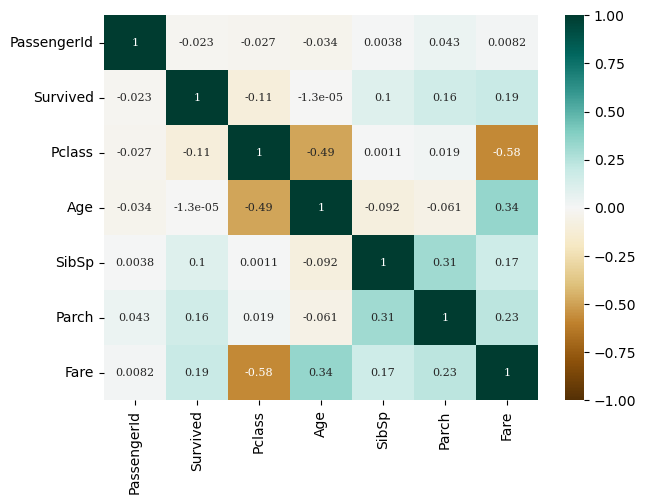

In [4]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='BrBG',             # 'cividis_r'
            vmin=-1, vmax=1,
            annot_kws={'fontsize':8, 'family':'serif'}
           )

Any block with a darker shade is correlated either positively or negatively. 

We also spot an anomaly in the _'Sex'_ column which shows a complete negative correlation _(-1)_. We shall inspect it further in the notebook.

## Handling missing values

Check for the missing values in the columns and handle them efficiently.

In [6]:
# check if any missing values exist in the columns
for col in df.columns.tolist():
    print(col,' :', any(df[col].isnull()),' -', 
          df[col].isna().sum(),':\t', 
          round(df[col].isnull().sum()/df.shape[0] * 100, 2), '%'
         )

PassengerId  : False  - 0 :	 0.0 %
Survived  : False  - 0 :	 0.0 %
Pclass  : False  - 0 :	 0.0 %
Name  : False  - 0 :	 0.0 %
Sex  : False  - 0 :	 0.0 %
Age  : True  - 86 :	 20.57 %
SibSp  : False  - 0 :	 0.0 %
Parch  : False  - 0 :	 0.0 %
Ticket  : False  - 0 :	 0.0 %
Fare  : True  - 1 :	 0.24 %
Cabin  : True  - 327 :	 78.23 %
Embarked  : False  - 0 :	 0.0 %


The columns with null values are `Age`, `Fare` and `Cabin` with 86 (_20.57%_), 1 (_0.24%)_ and 327 (_78.23%_) null values respectively.

Age and Cabin columns have a large amount of missing entries. We will fill the missing entries in 'Age' as `np.nan`. While we can fill the Fare with the mean value. In the case of 'Cabin' column, I believe it will be far more suitable to drop the column altogether as we cannot make any key inferences using the cabin number of the passangers. (unless we know the position of the cabin on the ship, in which case, with sufficient data, we might be able to make an assumption on which part of the ship sunk first)

In [7]:
# fill the missing entries 
df['Age'].fillna(np.nan, inplace=True)
df['Fare'].fillna(df.Fare.mean(), inplace=True)
# drop 'Cabin' col
df.drop(columns={'Cabin'}, axis=1, inplace=True)

# check for the number of null values
print(df[['Age', 'Fare']].isnull().sum())

Age     86
Fare     0
dtype: int64


We have successfully filled the missing entries in the dataframe with suitable substitutes and dropped the troublesome column.

## Exploratory Data Analysis

We must first see the effects of the various factors on survival. We need to inspect the related columns before we make model out of them. Nobody wants too much on their plate.

#### Age and Sex
Verify the effecs of age and sex on survival of the passangers.

In [8]:
df.Sex.value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [9]:
df.groupby(['Survived', 'Sex']).count()[['Age']]

,,Age
Survived,Sex,
0,male,205
1,female,127


Surprisingly, in our dataset none of the survivors are male and all of the females have survived. This means only one column is enough to deduce the survival of the passengers with a 100% efficiency which is neither realistic nor suitable to model. Hence, we better drop the passenger sex altogether.

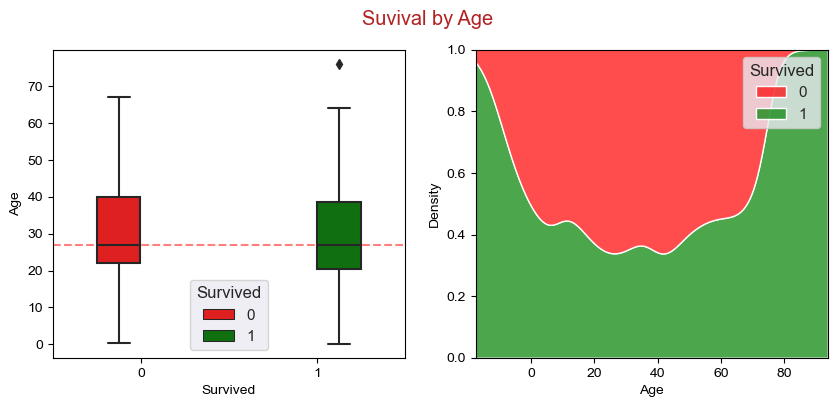

In [10]:
# plot a boxplot and a density plot to visualise the surval against age
# create subplot for the two plots and set size
fig, ax = plt.subplots(1, 2, figsize=(10,4) )
# set the plot background/theme
sns.set_theme(style='darkgrid', palette=['r','g'])

# plot the boxplot
sns.boxplot(ax=ax[0], data=df, x='Survived', y='Age', 
            hue='Survived', width=.5)
# add a median age line for survived
ax[0].axhline(df.groupby('Survived').median()['Age'].values[0], 
              ls='--', c='r', alpha=0.5,mouseover=True
             )

# plot the density plot and color by 'Survived'
sns.kdeplot(ax=ax[1], data=df, x='Age', hue='Survived', 
            multiple='fill', alpha=.7, cut=4
           ) 


# set the title of the figure
plt.suptitle('Suvival by Age', color='firebrick')
# display the plots
plt.show()

We can see that the median of ages of the survived and not survived passangers is the same. The reason behind this is explained in the density plot besides. The density plot shows an increase in the survival of the young as well as old passengers. The age less than `zero` are the unknown ages.
Fewer passengers in their middle ages have survived.

'The sharp increase after the age of 70 is what we expect from a morally civilized society.'

#### Embarked and Pclass

Visualize the survival by the embarkment port and age.

<Axes: xlabel='Age', ylabel='Embarked'>

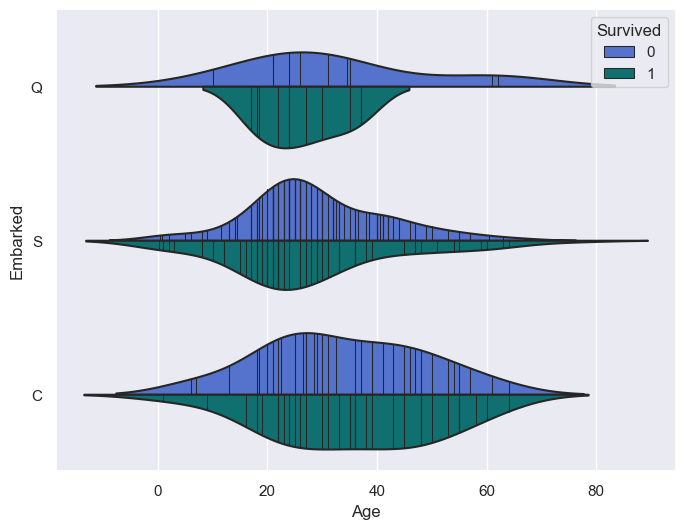

In [11]:
plt.figure(figsize=(8, 6))
# A violin plot of 'Age', 'Embarked', and 'Survived' columns
sns.violinplot(data=df, x='Age', y='Embarked', hue='Survived',
               inner="stick", gap=0, bw_method='silverman', 
               legend_out=True, legend ='auto', split=True,
               palette=['royalblue', 'teal']
            )

In [12]:
df.groupby(['Embarked', 'Pclass']).agg(['mean','sum', 'count'])[['Age', 'Fare']]

Age                       Fare                   
                      mean      sum count        mean          sum count
Embarked Pclass                                                         
C        1       40.481481  2186.00    54  110.073511  6164.116600    56
         2       25.111111   226.00     9   20.120445   221.324900    11
         3       22.973684   436.50    19   10.658700   373.054500    35
Q        1       37.000000    37.00     1   90.000000    90.000000     1
         2       52.666667   158.00     3   11.273950    45.095800     4
         3       25.000000   450.00    18    8.998985   368.958400    41
S        1       41.558140  1787.00    43   76.677504  3833.875200    50
         2       28.268684  2148.42    76   23.056090  1798.375000    78
         3       24.051193  2621.58   109   14.065946  1997.364388   142

The violinplot above gives us a clear view of distribution of the passangers and the ports they boarded the ship from according to their age and survival. 
The lines inside the plot represent each reading amd makes it easier to spot the readings as they occur. 
In the column S, C and Q stand for the ports of Southampton, Cherbourg, and Queenstown respectively.
Most of passangers belong to the third class and a huge majority of them have boarded the ship from Southampton.

The table below the plot futher shows the mean and sum of the ages and the ticket fares for each port's passengers divided by travelling classes.

#### SibSp and Parch

Let us now focus on families.

In [13]:
# number of people belonging to the same family
df['FamMems'] = df.SibSp + df.Parch + 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamMems
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,2
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,3


We have sucessfully added a new column that contains the number of people travelling together or the number of family members travelling together.

Now we see how many of them have managed to survive.

<Axes: xlabel='FamMems', ylabel='Age'>

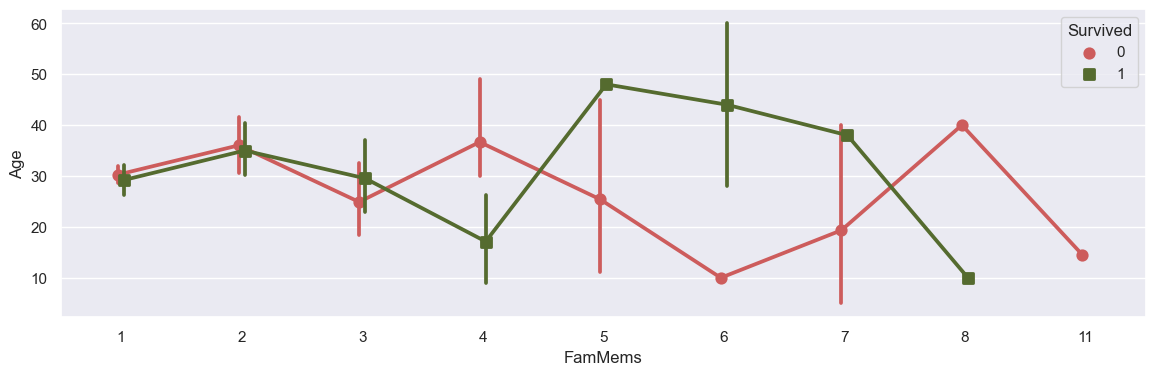

In [14]:
plt.figure(figsize=(14,4))
sns.pointplot(df, x='FamMems', y='Age', hue='Survived', 
              dodge=True, estimator='mean', 
              markers=['o','s'], 
              palette=['indianred','darkolivegreen']
             )

There are a maximum of 10 members with any of the passangers. 
Most passengers in their mid years have most family members travelling with them, as expected.

The passengers in a group of 5 and 7 have very high chances og not surviving while it the exact opposite for a group of 6. Miraculous!

> I would hereby like to work with the entire family data instead of the sibling/spouse and parent/children seperately. In case where I do not need to indentify the nature of family this will be more suitable. However, if one wishes to dig deeper into the nature of travelling and the relation between the survivors and the non-survivors, they may consider all the three columns.

# Data preprocessing

We will now extract _titles_ of the passengers. Extracting the titles will help us determine the social status of the passenger and thus the impact f their survival.

##### Extract passenger titles

In [15]:
# extract the titles of the passangers
df['Titles']= df.Name.str.extract('([A-Za-z]+)\.', expand=False)

print('The titles present in the dataframe are:')
df.Titles.unique()

The titles present in the dataframe are:


array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

Let us treat the gender non-specific titles as "rare" to make it easy for ourselves to decide the passenger's status.

In [16]:
df.Titles.replace(['Col', 'Rev', 'Dr', 'Dona'], 'Rare', inplace=True)
df.Titles.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Rare'], dtype=object)

The remaining titles tell us of the passengers' age and marital status thus they are better kept seperate.

##### Transform the catagorical data

In [17]:
# Do not run multiple times
le_titles = preprocessing.LabelEncoder()
df.Titles = le_titles.fit_transform(df.Titles)

In [18]:
le_embarked = preprocessing.LabelEncoder()

# fit embarked column
df.Embarked = le_embarked.fit_transform(df['Embarked'])
le_embarked.classes_

array(['C', 'Q', 'S'], dtype=object)

classes: C, Q, S 

transformed values: 0, 1, 2

We have successfully transformed the catagorical data into numerical data that we can use for our further analsis.

Let us check the correlation matrix once again but this time only for the `Survived` column.

##### Check the `Ticket` column

In [19]:
df.Ticket.describe()

count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object

The Ticket column is an object type data and contains the ticket number. We cannot convert such huge number of catagories to numerical frm as it will be of no avail to us. Hence, we will drop this column.

We have successfully transformed the relevent catagorical columns to the numerical type that can be used for modeling.

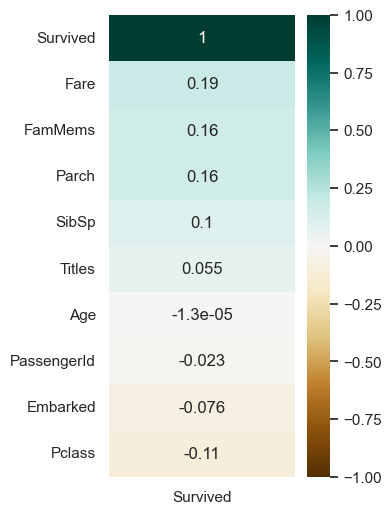

In [20]:
plt.figure(figsize=(3, 6))
heatmap = sns.heatmap(df.corr()[['Survived']].sort_values(by='Survived', ascending=False), 
                      annot=True, cmap='BrBG', vmin=-1, vmax=1
                     )

We can rightfully see the addition of the columns previously belonging to the catagorial dtype

### Tranform `Age` to catagories

Age data is too widespread. It will be more efficient it to age-groups and then to suitable catagories.

> _NOTE_:  Any age below `zero` is to betermed as unknown along with the null values.

In [21]:
df['AgeGroup'] = pd.cut(df.Age,
                        bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf], 
                        labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior'] 
                       ).fillna('Unknown')

In [22]:
df[['Age', 'AgeGroup']].head()

,Age,AgeGroup
0,34.5,Young Adult
1,47.0,Adult
2,62.0,Senior
3,27.0,Young Adult
4,22.0,Student


The age-groups have been created cuccessfully, now we can convert this column to numerical datatype.

In [23]:
age_map = {'Unknown':0, 'Baby':1, 'Child':2, 'Teenager':3, 'Student':4, 'Young Adult':5, 'Adult':6, 'Senior':7}
# map the dictionary to the column/Series
df.AgeGroup = df['AgeGroup'].map(age_map)
df[['Age', 'AgeGroup']].head()

,Age,AgeGroup
0,34.5,5
1,47.0,6
2,62.0,7
3,27.0,5
4,22.0,4


`AgeGroup` has been converted to a numerical catagory column. We no longer need the age column.

## Model Training

#### Function to plot the probabilities of prediction

In [24]:
def plot_probability_array(X,probability_array, model):

    plot_array=np.zeros((X.shape[0],20))
    col_start=0
    ones=np.ones((X.shape[0],20))
    for class_,col_end in enumerate([10,20]):
        plot_array[:,col_start:col_end]= np.repeat(probability_array[:,class_].reshape(-1,1), 10,axis=1)
        col_start=col_end
    plt.imshow(plot_array, vmax=1, vmin=0, cmap='Blues')
    plt.xticks([])
    plt.xlabel(f"{model}")
    plt.ylabel("Probability of Survival")
    plt.colorbar()
    plt.show()

### Preparing data for modeling

Remember all the columns we said we dont need? 

Just exclude them all here. This keeps our dataframe safe and we can come back to it to get those columns in case they are needed.

In [25]:
data = df.drop(['PassengerId', 'Ticket', 'Name', 'SibSp', 'Parch', 'Age', 'Fare', 'Sex'], axis=1)
data.head()

,Survived,Pclass,Embarked,FamMems,Titles,AgeGroup
0,0,3,1,1,2,5
1,1,3,2,2,3,6
2,0,2,1,1,2,7
3,0,3,2,1,2,5
4,1,3,2,3,3,4


In [26]:
X = data.drop('Survived', axis=1)
Y = data['Survived']
# verify that the shapes of the data match
X.shape, Y.shape

((418, 5), (418,))

Segregate the dat into training and testing datasest.

In [27]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, # leave 30% of the data for testing
                                                    random_state=0)

In [28]:
print("Train data:", x_train.shape, y_train.shape)
print('Test data:',x_test.shape, y_test.shape)

Train data: (292, 5) (292,)
Test data: (126, 5) (126,)


## Data Models

### 1. K nearest Neighbours

In [29]:
# K-nearest neighbors
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)
Yhat_knn = knn.predict(x_test)

r2_knn = round(knn.score(x_train, y_train), 2)
acc_score_knn = round(accuracy_score(Yhat_knn, y_test), 2)
jacc_score_knn = round(jaccard_score(y_test, Yhat_knn), 2)
f1_score_knn = round(metrics.f1_score(y_test, Yhat_knn), 2)

r2_knn, acc_score_knn, jacc_score_knn, f1_score_knn

(0.92, 0.71, 0.41, 0.58)

### 2. SVM

In [30]:
# Support Vector Machines
svc = SVC(probability=True)
svc.fit(x_train, y_train)
Yhat_svc = svc.predict(x_test)

r2_svc = round( svc.score(x_train, y_train), 2)
acc_score_svc = round( accuracy_score(Yhat_svc, y_test), 2)
jacc_score_svc = round( jaccard_score(y_test, Yhat_svc), 2)
f1_score_svc = round( metrics.f1_score(y_test, Yhat_svc), 2)

r2_svc, acc_score_svc, jacc_score_svc, f1_score_svc

(0.77, 0.64, 0.25, 0.4)

### 3. Logistic Regression

In [31]:
lr = LogisticRegression(random_state=0).fit(x_train, y_train)
Yhat_lr = lr.predict(x_test)

r2_lr = round( lr.score(x_train, y_train) * 100, 2)
acc_score_lr = round( accuracy_score(Yhat_lr, y_test), 2)
jacc_score_lr = round( jaccard_score(y_test, Yhat_lr), 2)
f1_score_lr = round( metrics.f1_score(y_test, Yhat_lr), 2)

r2_lr, acc_score_lr, jacc_score_lr, f1_score_lr

(67.81, 0.55, 0.07, 0.12)

## Evaluation

We must evaluate our models to find out the best suited model for this dataset.

In [32]:
model_performance = {'Model':['KNN', 'SVC', 'LogR'],
                     'r2_sc': [r2_knn, r2_svc, r2_lr],
                     'accuracy_sc': [acc_score_knn, acc_score_svc, acc_score_lr],
                     'jaccard_sc': [jacc_score_knn, jacc_score_svc, jacc_score_lr],
                     'f1_sc': [f1_score_knn, f1_score_svc, f1_score_lr]
                    }

model_df = pd.DataFrame(model_performance)
model_df.head()

,Model,r2_sc,accuracy_sc,jaccard_sc,f1_sc
0,KNN,0.92,0.71,0.41,0.58
1,SVC,0.77,0.64,0.25,0.40
2,LogR,67.81,0.55,0.07,0.12


We can verify accross the various scores that KNN turn out to be the best model among the three. This maybe because a group of people belonging to the same part of the ship with same travelling class have better or worse chances of surviving.

Let us also take a look at the probability of these predictions.

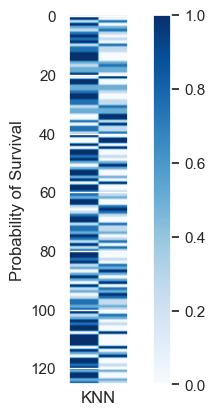

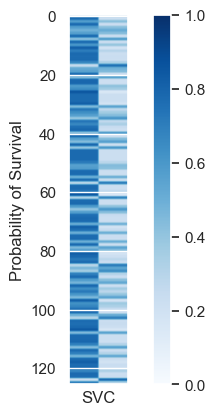

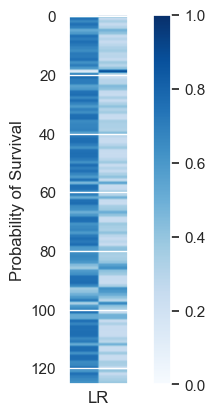

In [ ]:
# prediction probability of different models
knn_probability = knn.predict_proba(x_test)
svc_probability = svc.predict_proba(x_test)
lr_probability = lr.predict_proba(x_test)

# plot the probability arrays
plot_probability_array(x_test, knn_probability, 'KNN')
plot_probability_array(x_test, svc_probability, 'SVC')
plot_probability_array(x_test, lr_probability, 'LR')

## Conclusion

* We have built a machine learning model of thetitanic dataset.
* We compared the three data models against each other based on various evaluation scores.
* KNN is the best suited model for this dataset under our given assumptions.
* We further found the survival probability according to various models and visualized them.

> ## Thank You for scrolling Through